<a href="https://colab.research.google.com/github/ayjiang97/temp_BA780/blob/main/Exercise_01_Pandas_and_Missing_Values_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise (continued) - Working with Pandas and Seaborn

Now it's your turn to practice what we learned in the class.

In this notebook we will play with some of the concepts we just learned, such as handling missing values, grouping, and aggregation. You have seen this dataset in the previous class, so the first part of the notebook doesn't require you to write any code.

We are working with the following dataset: `data/2017_StPaul_MN_Real_Estate.csv`

Let's call this DataFrame `houses`. We can import the data using a URL, if the data file is located on the internet. This is a very convinient option since our file is located in my Github, however, this is not always the case and in real life the data is not on a public URL. We will use the URL syntax as much as possible to avoid any local path issues:

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/2017_StPaul_MN_Real_Estate.csv'
houses = pd.read_csv(url)

print("There are {} rows and {} columns.".format(houses.shape[0], houses.shape[1]))

There are 5000 rows and 74 columns.


This dataset has too many columns to study. To start, let's create a new dataset with a smaller number of attributes. To do this, use the following list, `subset_columns`:

In [2]:
subset_columns = ['streetaddress','STREETNAME', 'PostalCode', 'StateOrProvince', 'City', 'SchoolDistrictNumber',
                  'SalesClosePrice', 'LISTDATE', 'offmarketdate', 'LISTPRICE', 'LISTTYPE', 
                  'OriginalListPrice', 'PricePerTSFT', 'DAYSONMARKET', 'ROOF', 
                  'SQFTABOVEGROUND', 'RoomArea1', 'YEARBUILT']

df = houses[subset_columns].copy()  # This will create an individual copy of the original DataFrame

# Adding a new column, sales_vs_list
df['sales_vs_list'] = (df['SalesClosePrice'] - df['LISTPRICE'])/df['LISTPRICE'] * 100

print("There are {} rows and {} columns.".format(df.shape[0], df.shape[1]))
df.head()

There are 5000 rows and 19 columns.


,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SchoolDistrictNumber,SalesClosePrice,LISTDATE,offmarketdate,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,DAYSONMARKET,ROOF,SQFTABOVEGROUND,RoomArea1,YEARBUILT,sales_vs_list
0,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,834 - Stillwater,143000,7/15/2017 0:00,7/30/2017 0:00,139900,Exclusive Right,139900,145.9184,10,NaN,980,16 x 13,1950,2.215868
1,11200 31st St N,31st,55042,MN,LELM - Lake Elmo,834 - Stillwater,190000,10/9/2017 0:00,10/13/2017 0:00,210000,Exclusive Right,210000,85.2783,4,"Asphalt Shingles, Pitched, Age 8 Years or Less",1268,22x14,1971,-9.523810
2,8583 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,622 - North St Paul-Maplewood,225000,6/26/2017 0:00,7/24/2017 0:00,225000,Exclusive Right,225000,204.1742,28,NaN,1102,20x13,1949,0.000000
3,9350 31st St N,31st,55042,MN,LELM - Lake Elmo,834 - Stillwater,265000,8/25/2017 0:00,9/13/2017 0:00,230000,Exclusive Right,230000,162.3775,19,"Asphalt Shingles, Pitched, Age 8 Years or Less",1284,NaN,1960,15.217391
4,2915 Inwood Ave N,Inwood,55042,MN,LELM - Lake Elmo,622 - North St Paul-Maplewood,249900,9/12/2017 0:00,10/3/2017 0:00,239900,Exclusive Right,239900,121.7836,21,"Asphalt Shingles, Age Over 8 Years",1026,22x14,1978,4.168404


Use `describe()` to get a high level summary of the data:

In [ ]:
df.describe()

,PostalCode,SalesClosePrice,LISTPRICE,OriginalListPrice,PricePerTSFT,DAYSONMARKET,SQFTABOVEGROUND,YEARBUILT,sales_vs_list
count,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,55113.216600,2.628045e+05,2.634194e+05,2.750026e+05,199.869863,28.358400,1489.013000,1958.99960,0.091693
std,16.040821,1.405598e+05,1.439441e+05,4.096207e+05,3887.265428,28.708702,626.486803,38.84975,4.514791
min,55042.000000,4.800000e+04,4.000000e+04,5.000000e+00,29.556700,0.000000,1.000000,1850.00000,-32.584270
25%,55105.000000,1.746500e+05,1.720000e+05,1.749000e+05,117.774375,9.000000,1074.000000,1923.00000,-1.937002
50%,55116.000000,2.250000e+05,2.249000e+05,2.250000e+05,135.728700,19.000000,1320.000000,1959.00000,0.000000
75%,55125.000000,3.150000e+05,3.150000e+05,3.200000e+05,164.092350,38.000000,1733.000000,1995.00000,2.000000
max,55130.000000,1.700000e+06,1.850000e+06,2.199000e+07,275000.000000,225.000000,7200.000000,2018.00000,100.000000


Using `.info()` extract more info regarding the missing values and columns types:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
streetaddress           5000 non-null object
STREETNAME              5000 non-null object
PostalCode              5000 non-null int64
StateOrProvince         5000 non-null object
City                    5000 non-null object
SchoolDistrictNumber    5000 non-null object
SalesClosePrice         5000 non-null int64
LISTDATE                5000 non-null object
offmarketdate           5000 non-null object
LISTPRICE               5000 non-null int64
LISTTYPE                5000 non-null object
OriginalListPrice       5000 non-null int64
PricePerTSFT            5000 non-null float64
DAYSONMARKET            5000 non-null int64
ROOF                    4235 non-null object
SQFTABOVEGROUND         5000 non-null int64
RoomArea1               4543 non-null object
YEARBUILT               5000 non-null int64
sales_vs_list           5000 non-null float64
dtypes: float64(2), int64(7), object(10)
me

From the outcome of `info()` we can see that columns *ROOF* and *RoomArea1* have some null values. We can first visually inspect the rows where for instance *ROOF* is missing and see if we find any common cause:

In [ ]:
df[df['ROOF'].isnull()].head()

,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SchoolDistrictNumber,SalesClosePrice,LISTDATE,offmarketdate,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,DAYSONMARKET,ROOF,SQFTABOVEGROUND,RoomArea1,YEARBUILT,sales_vs_list
0,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,834 - Stillwater,143000,7/15/2017 0:00,7/30/2017 0:00,139900,Exclusive Right,139900,145.9184,10,NaN,980,16 x 13,1950,2.215868
2,8583 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,622 - North St Paul-Maplewood,225000,6/26/2017 0:00,7/24/2017 0:00,225000,Exclusive Right,225000,204.1742,28,NaN,1102,20x13,1949,0.000000
26,8687 Lake Jane Trl N,Lake Jane,55042,MN,LELM - Lake Elmo,834 - Stillwater,310000,5/4/2017 0:00,5/12/2017 0:00,300000,Exclusive Right,350000,123.0647,8,NaN,1649,15x19,1973,3.333333
31,2410 Lisbon Ave N,Lisbon,55042,MN,LELM - Lake Elmo,834 - Stillwater,305000,6/8/2017 0:00,7/17/2017 0:00,319000,Exclusive Right,319000,132.0346,7,NaN,2060,18x15,1978,-4.388715
40,5231 Hilltop Ave N,Hilltop,55042,MN,LELM - Lake Elmo,622 - North St Paul-Maplewood,380000,7/5/2017 0:00,7/5/2017 0:00,380000,Exclusive Right,380000,113.7044,0,NaN,2542,NaN,1978,0.000000


# Your Trun

Let's find out what possible values *ROOF* can get. We can do this by applying `.unique()` function on the column of interest

In [ ]:
# Your answer goes here
df['ROOF'].unique()

array([nan, 'Asphalt Shingles, Pitched, Age 8 Years or Less',
       'Asphalt Shingles, Age Over 8 Years',
       'Asphalt Shingles, Age 8 Years or Less', 'Asphalt Shingles',
       'Asphalt Shingles, Pitched, Age Over 8 Years',
       'Age 8 Years or Less', 'Asphalt Shingles, Pitched',
       'Pitched, Age 8 Years or Less', 'Flat, Tar/Gravel', 'Flat',
       'Age Over 8 Years', 'Asphalt Shingles, Age Over 8 Years, Rubber',
       'Flat, Tar/Gravel, Rubber',
       'Asphalt Shingles, Pitched, Age Over 8 Years, Rubber',
       'Unspecified Shingle', 'Pitched, Age Over 8 Years',
       'Asphalt Shingles, Rubber', 'Metal',
       'Asphalt Shingles, Pitched, Flat, Age 8 Years or Less, Age Over 8 Years, Rubber',
       'Asphalt Shingles, Flat, Tar/Gravel, Age Over 8 Years, Rubber',
       'Pitched',
       'Asphalt Shingles, Age 8 Years or Less, Age Over 8 Years',
       'Pitched, Unspecified Shingle',
       'Unspecified Shingle, Age Over 8 Years', 'Asphalt Shingles, Flat',
       'Flat, R

This is great, but wouldn't it be even cooler to see how popular these roofs are? Let's use a `groupby()` on our `df` DataFrame and count how many times each roof type was used in the dataset. The easy way to do this is to use the function `size()`, which will give you the number of elements in each group:

hint1: this will print a long list, you can use `.head(10)` to limit it.

In [ ]:
# Your answer goes here
df.groupby('ROOF').size().head(10)

ROOF
Age 8 Years or Less                        95
Age 8 Years or Less, Metal                  1
Age Over 8 Years                           70
Age Over 8 Years, Other                     1
Age Over 8 Years, Shakes                    1
Age Over 8 Years, Shakes, Wood Shingles     1
Age Over 8 Years, Slate                     1
Age Over 8 Years, Slate, Metal              1
Age Over 8 Years, Tile                      2
Age Over 8 Years, Tile, Metal               1
dtype: int64

Now we will sort it to get the most common ones on top. Use `.sort_values()` (right after your aggregation function and before using `head()`. If you use it after head it will only sort among the limited ones that were printed which is not what we are looking for here):

In [ ]:
# Your answer goes here
df.groupby('ROOF').size().sort_values(ascending=False).head(10)

ROOF
Asphalt Shingles                                  1417
Asphalt Shingles, Age 8 Years or Less              839
Asphalt Shingles, Age Over 8 Years                 643
Asphalt Shingles, Pitched, Age 8 Years or Less     362
Asphalt Shingles, Pitched                          292
Asphalt Shingles, Pitched, Age Over 8 Years        268
Age 8 Years or Less                                 95
Age Over 8 Years                                    70
Flat                                                60
Flat, Age Over 8 Years                              19
dtype: int64

Let's find out how many values are missig from *ROOF* (even though we can find out from `info()`).

1. Subset the column of interest by the following format: `DF['col1']`. This will give us a Series object.
2. Chain the `isnull()` function to this Series. I.e, `DF['col1'].isnull()`
3. Chain the `sum()` function to the previous step

In [14]:
# Your answer goes here
df['ROOF'].isnull().sum()

765

Let's replace the null values with the most commonly value used in the dataset, "Asphalt Shingles". **Note:** This may or may not be the right thing to do depending on the problem you are solving. 

To do so we can use the `.fillna()` function, chain it to the column subset, `df['ROOF']`. Within the argument of this function you want to first pass the replacement to be used, here "Asphalt Shingles", and then `inplace=True`. If we don't specify the inplace being active it won't permanently fill the nulls in our DataFrame.

In [5]:
# Your answer goes here
df['ROOF'].fillna('Asphalt Shingles',inplace=True)

Check if there are any nulls left in that column (similar to the cell above):

In [17]:
# Your answer goes here
df['ROOF'].isnull().sum()

0

Check out the `info()`:

In [20]:
# Your answer goes here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   streetaddress         5000 non-null   object 
 1   STREETNAME            5000 non-null   object 
 2   PostalCode            5000 non-null   int64  
 3   StateOrProvince       5000 non-null   object 
 4   City                  5000 non-null   object 
 5   SchoolDistrictNumber  5000 non-null   object 
 6   SalesClosePrice       5000 non-null   int64  
 7   LISTDATE              5000 non-null   object 
 8   offmarketdate         5000 non-null   object 
 9   LISTPRICE             5000 non-null   int64  
 10  LISTTYPE              5000 non-null   object 
 11  OriginalListPrice     5000 non-null   int64  
 12  PricePerTSFT          5000 non-null   float64
 13  DAYSONMARKET          5000 non-null   int64  
 14  ROOF                  5000 non-null   object 
 15  SQFTABOVEGROUND      

We can see that the only column with null is `RoomArea1`. For the sake of practice let's handle it differently this time. We will drop any records that doesn't have a value for this column. We can do this using `dropna()` function.

Do NOT use the option `inplace=True`, instead save the output into a new DataFrame called `df2`:

In [25]:
# Your answer goes here
df2 = df.dropna()   # direcly drop from df

Check out the `info()` on `df2`:

In [ ]:
# Your answer goes here
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4543 entries, 0 to 4999
Data columns (total 19 columns):
streetaddress           4543 non-null object
STREETNAME              4543 non-null object
PostalCode              4543 non-null int64
StateOrProvince         4543 non-null object
City                    4543 non-null object
SchoolDistrictNumber    4543 non-null object
SalesClosePrice         4543 non-null int64
LISTDATE                4543 non-null object
offmarketdate           4543 non-null object
LISTPRICE               4543 non-null int64
LISTTYPE                4543 non-null object
OriginalListPrice       4543 non-null int64
PricePerTSFT            4543 non-null float64
DAYSONMARKET            4543 non-null int64
ROOF                    4543 non-null object
SQFTABOVEGROUND         4543 non-null int64
RoomArea1               4543 non-null object
YEARBUILT               4543 non-null int64
sales_vs_list           4543 non-null float64
dtypes: float64(2), int64(7), object(10)
me

`dropna()` removes all of the records that have any number of nulls. For other functionalities please check out the help function or go back to 02-Aggregation-and-Grouping.ipynb.

We could continue with `df2` but we weren't really planing on using `RoomArea1` for this analysis. In order to have a clean dataset let's just remove that column. The advantage would be that we get to keep all the 5000 data points.

To do so we will use `drop()` function. 

1. Pass the name of the column to drop
2. Set parameter `axis=1`. This will indicate that the name that we passed is a column name and not a row name (index)
3. `inplace=True`

In [3]:
# Your answer goes here
df.drop('RoomArea1',axis=1,inplace=True)   

Check out the `info()`:

In [6]:
# Your answer goes here
df.info()  # ROOF's na replaced by the most common value, RoomArea1 was dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   streetaddress         5000 non-null   object 
 1   STREETNAME            5000 non-null   object 
 2   PostalCode            5000 non-null   int64  
 3   StateOrProvince       5000 non-null   object 
 4   City                  5000 non-null   object 
 5   SchoolDistrictNumber  5000 non-null   object 
 6   SalesClosePrice       5000 non-null   int64  
 7   LISTDATE              5000 non-null   object 
 8   offmarketdate         5000 non-null   object 
 9   LISTPRICE             5000 non-null   int64  
 10  LISTTYPE              5000 non-null   object 
 11  OriginalListPrice     5000 non-null   int64  
 12  PricePerTSFT          5000 non-null   float64
 13  DAYSONMARKET          5000 non-null   int64  
 14  ROOF                  5000 non-null   object 
 15  SQFTABOVEGROUND      

Okay! Now that we don't have any missing values in our DataFrame let's continue with some aggregation tasks.

Group our `df` by "City" and calculate min, max, and count for every group and every column.

Hint: use function `agg()` and pass a list of aggregation function you need.

In [ ]:
# Your answer goes here
df.groupby('City').agg([min,max])

streetaddress                       STREETNAME  \
                                  min                   max        min   
City                                                                     
LELM - Lake Elmo    10024 Tapestry Rd  9957 5th Street Ln N       11th   
MAPW - Maplewood  1004 Crestview Dr S        999 Kohlman Ln       Abel   
OAKD - Oakdale    1062 Hillvale Ave N    950 Gershwin Ave N       10th   
STP - Saint Paul    1 Irvine Park, 1B       998 Linwood Ave       10th   
WB - Woodbury        10033 Raleigh Ct      9965 Tamarack Cv     Acadia   

                                PostalCode        StateOrProvince      \
                            max        min    max             min max   
City                                                                    
LELM - Lake Elmo     Wildflower      55042  55042              MN  MN   
MAPW - Maplewood  mcafee circle      55106  55119              MN  MN   
OAKD - Oakdale        Upper 5th      55128  55128              MN  MN   
STP - Saint Paul         dieter      55101  55130              MN  MN   
WB - Woodbury          York Bay      55125  55129              MN  MN   

                           SchoolDistrictNumber  \
                                            min   
City                                              
LELM - Lake Elmo             6 - South St. Paul   
MAPW - Maplewood  622 - North St Paul-Maplewood   
OAKD - Oakdale    622 - North St Paul-Maplewood   
STP - Saint Paul                623 - Roseville   
WB - Woodbury     622 - North St Paul-Maplewood   

                                                    ...     DAYSONMARKET       \
                                            max     ...              min  max   
City                                                ...                         
LELM - Lake Elmo               834 - Stillwater     ...                0  174   
MAPW - Maplewood          624 - White Bear Lake     ...                0  158   
OAKD - Oakdale    622 - North St Paul-Maplewood     ...                0  195   
STP - Saint Paul                 625 - St. Paul     ...                0  225   
WB - Woodbury                  834 - Stillwater     ...                0  191   

                                 ROOF                                         \
                                  min                                    max   
City                                                                           
LELM - Lake Elmo  Age 8 Years or Less           Pitched, Age 8 Years or Less   
MAPW - Maplewood  Age 8 Years or Less                    Unspecified Shingle   
OAKD - Oakdale    Age 8 Years or Less           Pitched, Unspecified Shingle   
STP - Saint Paul  Age 8 Years or Less  Unspecified Shingle, Age Over 8 Years   
WB - Woodbury     Age 8 Years or Less                          Wood Shingles   

                 SQFTABOVEGROUND       YEARBUILT       sales_vs_list  \
                             min   max       min   max           min   
City                                                                   
LELM - Lake Elmo             980  4870      1949  2018     -9.523810   
MAPW - Maplewood             739  3128      1896  2017    -15.068493   
OAKD - Oakdale               621  3262      1888  2017    -22.222222   
STP - Saint Paul               1  7200      1858  2017    -32.584270   
WB - Woodbury                687  4321      1850  2017    -16.620345   

                              
                         max  
City                          
LELM - Lake Elmo   15.217391  
MAPW - Maplewood   11.830489  
OAKD - Oakdale     11.000636  
STP - Saint Paul  100.000000  
WB - Woodbury      35.747711  

[5 rows x 34 columns]

Too many values are being printed and it's really hard to read. Let's limit this by asking to show `SalesClosePrice` and `SQFTABOVEGROUND` only.

Hint: you can do this by passing `[['SalesClosePrice', 'SQFTABOVEGROUND']]` to groupby.

In [ ]:
# Your answer goes here
df.groupby('City')[['SalesClosePrice', 'SQFTABOVEGROUND']].agg(['min','max','count'])

SalesClosePrice                SQFTABOVEGROUND            
                             min      max count             min   max count
City                                                                       
LELM - Lake Elmo          143000  1277023   155             980  4870   155
MAPW - Maplewood           90000   535000   473             739  3128   473
OAKD - Oakdale             78000   439000   400             621  3262   400
STP - Saint Paul           48000  1700000  2825               1  7200  2825
WB - Woodbury              90000  1077200  1147             687  4321  1147

Use `describe()` and `groupby()` to get a high level summary of "LISTPRICE" for each "City".

1. Apply groupby and use the column you want to group with
2. Pass the name of the column you'd like `describe()` to describe!
3. Chain `describe()`

In [19]:
# Your answer goes here
df.groupby('City')['LISTPRICE'].describe()

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
LELM - Lake Elmo,155.0,457157.380645,165685.771104,139900.0,342450.0,437436.0,516532.5,1285479.0
MAPW - Maplewood,473.0,233108.215645,66801.553050,85000.0,189900.0,224900.0,259000.0,549900.0
OAKD - Oakdale,400.0,223928.325000,70882.890951,79900.0,166125.0,219900.0,269900.0,495000.0
STP - Saint Paul,2825.0,240065.377345,147211.225853,40000.0,160000.0,199900.0,265000.0,1850000.0
WB - Woodbury,1147.0,321029.837838,137976.708986,94900.0,210000.0,304900.0,399900.0,1077200.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x="City", y="SalesClosePrice", data=df, inner="quartile",
               scale='count')
plt.xticks(rotation=90)
plt.title("Distribution of Closing Price for Different Cities")
sns.despine()

This time your turn. Use the `boxplot()` function to plot box plots of `sales_vs_list` for each city:

Hint: Code the similar to the one above without setting parameters inner and scale.

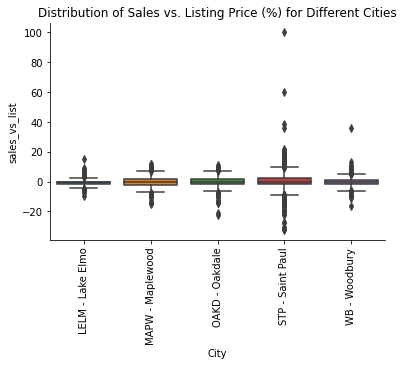

In [21]:
# Your answer goes here
sns.boxplot(x="City", y="sales_vs_list", data=df)
plt.xticks(rotation=90)
plt.title("Distribution of Sales vs. Listing Price (%) for Different Cities")
sns.despine()

Notice that we have modified the "inner" option of the plot above. It accepts the following values: {"box", "quartile", "point", "stick", None}. Try them to see the difference.

We also have changed the scale method, the method used to scale the width of each violin. These are the possible options: {"area", "count", "width"}. If ``area``, each violin will have the same area. If ``count``, the width of the violins will be scaled by the number of observations in that bin. If ``width``, each violin will have the same width.

Now let's use the `agg()` function to find the avergae `SalesClosePrice` per each `PostalCode` and `count` for each group:

In [ ]:
# Your answer goes here
df.groupby('PostalCode')['SalesClosePrice'].agg(['mean','count'])

,mean,count
PostalCode,,
55042,453924.451613,155
55101,229211.651685,89
55102,254126.765625,256
55103,185478.571429,70
55104,245745.831606,386
55105,394371.244068,295
55106,175005.966165,532
55107,188804.597222,144
55108,286337.745098,102


Let's use the `filter()` function to filter all the houses that are within `PostalCode` that have had an average `SalesClosePrice` of less than 250,000. Save the result to a new DataFrame and call it `df_inexpensive_zips`. Run the aggregate again:

In [ ]:
# Your answer goes here
#######################
def filter_func(x):
    return x['SalesClosePrice'].mean() < 250000

df_inexpensive_zips = df.groupby('PostalCode').filter(filter_func)

In [ ]:
# Your answer goes here
df_inexpensive_zips.head(3)

,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SchoolDistrictNumber,SalesClosePrice,LISTDATE,offmarketdate,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,DAYSONMARKET,ROOF,SQFTABOVEGROUND,YEARBUILT,sales_vs_list
155,"1215 Ferndale St N, A8",Ferndale,55119,MN,MAPW - Maplewood,622 - North St Paul-Maplewood,90000,4/20/2017 0:00,5/18/2017 0:00,85000,Exclusive Right,85000,100.2227,6,Asphalt Shingles,898,1983,5.882353
156,"2465 Londin Ln E, 207",Londin,55119,MN,MAPW - Maplewood,622 - North St Paul-Maplewood,94900,5/4/2017 0:00,5/15/2017 0:00,94900,Exclusive Right,94900,112.9762,11,"Flat, Tar/Gravel",840,1973,0.000000
157,"701 Larpenteur Ave E, 701G",Larpenteur,55117,MN,MAPW - Maplewood,623 - Roseville,112500,12/13/2017 0:00,1/22/2018 0:00,115000,Exclusive Right,115000,103.2110,5,Asphalt Shingles,1090,1984,-2.173913


In [ ]:
# Your answer goes here
df_inexpensive_zips.groupby('PostalCode')['SalesClosePrice'].agg(['mean', 'count'])

,mean,count
PostalCode,,
55101,229211.651685,89
55103,185478.571429,70
55104,245745.831606,386
55106,175005.966165,532
55107,188804.597222,144
55109,228107.943231,229
55113,186333.333333,3
55114,233278.260870,23
55117,191768.424855,346


Use the `transform()` function on `df_inexpensive_zips` to create a new column called `SalesPriceNormalized` that shows the proportional value of a sold house to the most expensive house sold within the same zipcode:

In [ ]:
# Your answer goes here
#########################
df_inexpensive_zips['SalesPriceNormalized'] = \
  df_inexpensive_zips.groupby('PostalCode')[['SalesClosePrice']].transform(lambda x: round(x/max(x),2))

df_inexpensive_zips.head(3)

/Users/msoltani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SchoolDistrictNumber,SalesClosePrice,LISTDATE,offmarketdate,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,DAYSONMARKET,ROOF,SQFTABOVEGROUND,YEARBUILT,sales_vs_list,SalesPriceNormalized
155,"1215 Ferndale St N, A8",Ferndale,55119,MN,MAPW - Maplewood,622 - North St Paul-Maplewood,90000,4/20/2017 0:00,5/18/2017 0:00,85000,Exclusive Right,85000,100.2227,6,Asphalt Shingles,898,1983,5.882353,0.17
156,"2465 Londin Ln E, 207",Londin,55119,MN,MAPW - Maplewood,622 - North St Paul-Maplewood,94900,5/4/2017 0:00,5/15/2017 0:00,94900,Exclusive Right,94900,112.9762,11,"Flat, Tar/Gravel",840,1973,0.000000,0.18
157,"701 Larpenteur Ave E, 701G",Larpenteur,55117,MN,MAPW - Maplewood,623 - Roseville,112500,12/13/2017 0:00,1/22/2018 0:00,115000,Exclusive Right,115000,103.2110,5,Asphalt Shingles,1090,1984,-2.173913,0.29
